# Data Analyze
## Daily Happiness & Employee Turnover

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import preprocessing
import numpy as np
from scipy.stats import linregress
import datetime as dt

In [2]:
churn = pd.read_csv('churn.csv')
commentInteractions = pd.read_csv('commentInteractions.csv')
votes = pd.read_csv('votes.csv')
comments_clean_anonimized = pd.read_csv('comments_clean_anonimized.csv')

/home/osboxes/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 1.1 Last participation date of employees

## The lastParticipationExists.csv file contains information about the date of the last interaction of an employee with the app.

    employee: An integer id that identifies an amployee inside a company. (negative = not in the company anymore)
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    numVotes: Total number of happyness votes emited by the user.
    lastParticipationDate: Date of the last interaction of the user with the app.
    stillExists: Boolean that is True if the user is still registered in the app.

In [3]:
churn

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,Thu Feb 23 12:48:04 CET 2017,True
1,-2,56aec740f1ef260003e307d6,0,Wed Jan 18 14:00:55 CET 2017,False
2,2,56aec740f1ef260003e307d6,72,Fri Mar 17 01:00:00 CET 2017,True
3,487,56aec740f1ef260003e307d6,14,Sat Nov 19 15:02:14 CET 2016,False
4,3,56aec740f1ef260003e307d6,22,Thu Feb 16 01:00:00 CET 2017,True
...,...,...,...,...,...
4842,857,58a728a0e75bda00042a3468,1,Fri Mar 17 15:43:58 CET 2017,True
4843,858,58a728a0e75bda00042a3468,1,Fri Mar 17 17:00:00 CET 2017,True
4844,859,58a728a0e75bda00042a3468,1,Fri Mar 17 17:01:54 CET 2017,True
4845,17,573a0671b5ec330003add34a,7,Tue Jun 28 02:00:00 CEST 2016,True


In [4]:
# remove negative users, there seems to have no activities for these users
churn = churn[churn.employee > 0]
churn['uid'] = churn.employee.apply(str) + churn.companyAlias
churn = churn.drop_duplicates()
churn.sample()

<ipython-input-4-38d01ca9f760>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn['uid'] = churn.employee.apply(str) + churn.companyAlias


,employee,companyAlias,numVotes,lastParticipationDate,stillExists,uid
3682,17,56ae7b02f1ef260003e3072c,1,Tue Feb 02 01:00:00 CET 2016,True,1756ae7b02f1ef260003e3072c


<AxesSubplot:>

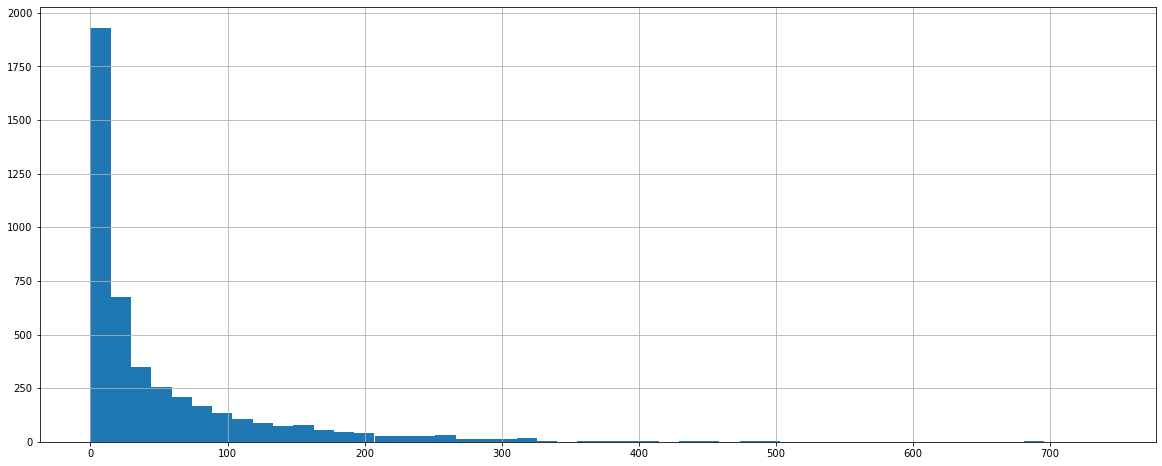

In [232]:
plt.figure(figsize=(20,8)) 
churn.numVotes.hist(bins = 50)

In [6]:
churn.lastParticipationDate = pd.to_datetime(churn.lastParticipationDate)
#pd.to_datetime(churn.lastParticipationDate).apply(lambda x: x.toordinal())

In [7]:
churn_2016 = churn[(churn['lastParticipationDate'] >= '2016-01-01') & (churn['lastParticipationDate'] < '2017-01-01')]

In [8]:
churn.lastParticipationDate.describe()

<ipython-input-8-4780018c3794>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  churn.lastParticipationDate.describe()


count                          4418
unique                         1484
top       2017-03-20 01:00:00+01:00
freq                            478
first     2014-06-07 02:00:00+02:00
last      2017-03-20 21:25:54+01:00
Name: lastParticipationDate, dtype: object

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               4418 non-null   int64                    
 1   companyAlias           4418 non-null   object                   
 2   numVotes               4418 non-null   int64                    
 3   lastParticipationDate  4418 non-null   datetime64[ns, tzlocal()]
 4   stillExists            4418 non-null   bool                     
 5   uid                    4418 non-null   object                   
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(2)
memory usage: 211.4+ KB


<AxesSubplot:xlabel='lastParticipationDate', ylabel='numVotes'>

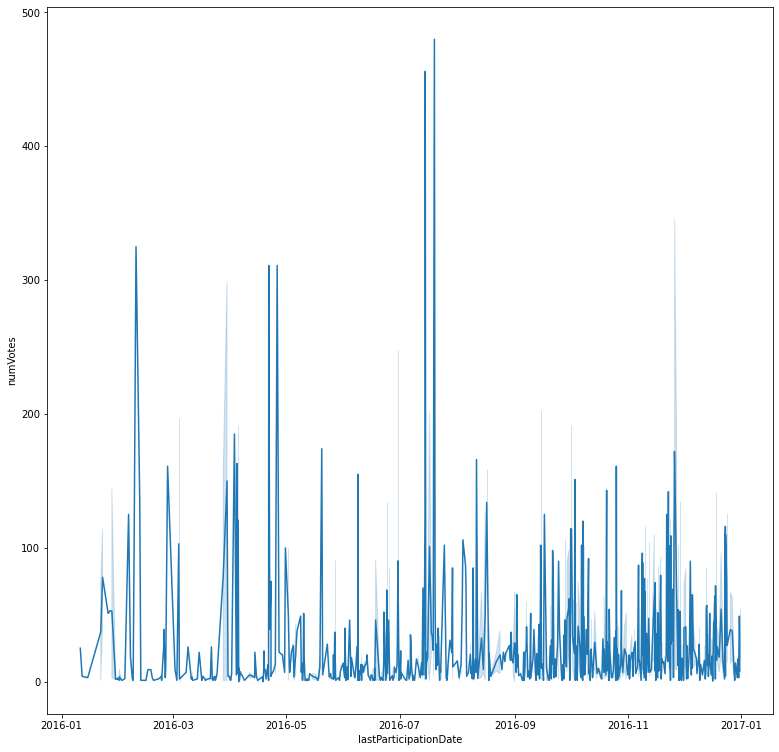

In [10]:
fig, ax = plt.subplots(figsize=(13,13))
sns.lineplot(data=churn_2016, x="lastParticipationDate", y="numVotes")

<AxesSubplot:xlabel='stillExists', ylabel='count'>

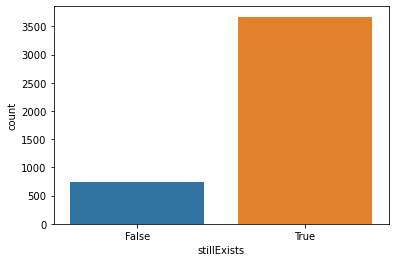

In [11]:
sns.countplot(x="stillExists", data=churn)

In [12]:
employee_still_exists = churn[(churn.stillExists == True) & (churn.employee > 0)]
employee_still_exists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3673 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               3673 non-null   int64                    
 1   companyAlias           3673 non-null   object                   
 2   numVotes               3673 non-null   int64                    
 3   lastParticipationDate  3673 non-null   datetime64[ns, tzlocal()]
 4   stillExists            3673 non-null   bool                     
 5   uid                    3673 non-null   object                   
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(2)
memory usage: 175.8+ KB


In [13]:
employee_still_exists.numVotes.mean()

52.253199019874764

In [14]:
employee_doesnot_exists = churn[(churn.stillExists == False) & (churn.employee > 0)]
employee_doesnot_exists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 3 to 4730
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               745 non-null    int64                    
 1   companyAlias           745 non-null    object                   
 2   numVotes               745 non-null    int64                    
 3   lastParticipationDate  745 non-null    datetime64[ns, tzlocal()]
 4   stillExists            745 non-null    bool                     
 5   uid                    745 non-null    object                   
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(2)
memory usage: 35.6+ KB


In [15]:
employee_doesnot_exists.numVotes.mean()

40.98523489932886

<AxesSubplot:>

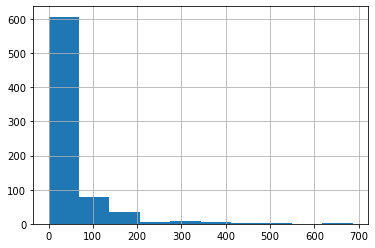

In [16]:
employee_doesnot_exists.numVotes.hist()

<AxesSubplot:>

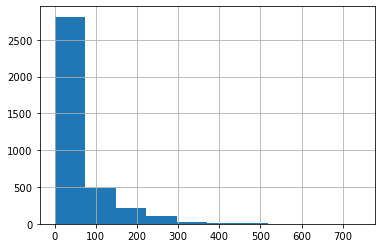

In [17]:
employee_still_exists.numVotes.hist()

In [18]:
to_transform = churn.groupby('companyAlias').mean().drop('employee', axis=1)
to_transform.head()

,numVotes,stillExists
companyAlias,,
5370af43e4b0cff95558c12a,28.285714,0.227679
53a2dd43e4b01cc02f1e9011,32.500000,0.916667
5474b9cde4b0bf7614b2c66f,4.600000,1.000000
54d43612e4b0f6a40755d93e,21.190476,0.666667
54e52607e4b01191dc064966,87.622222,0.507692


In [19]:
# à gérêr plus tard
x = to_transform[['numVotes']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [20]:
#df['stillExists'] = churn.stillExists.astype(int)
df['stillExists'] = to_transform.stillExists.values

In [21]:
df['companyAlias'] = to_transform.reset_index().companyAlias

In [22]:
df.columns = ['numVotes','stillExists','companyAlias']

<AxesSubplot:xlabel='numVotes', ylabel='stillExists'>

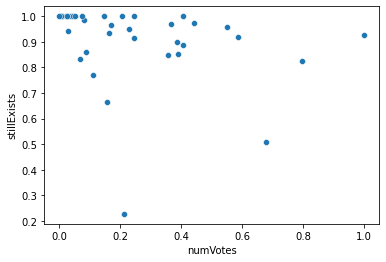

In [23]:
sns.scatterplot(data=df, x="numVotes", y="stillExists")

In [24]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               4418 non-null   int64                    
 1   companyAlias           4418 non-null   object                   
 2   numVotes               4418 non-null   int64                    
 3   lastParticipationDate  4418 non-null   datetime64[ns, tzlocal()]
 4   stillExists            4418 non-null   bool                     
 5   uid                    4418 non-null   object                   
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(2)
memory usage: 371.4+ KB


In [25]:
personnes_absentes = churn[churn.stillExists == False].uid

In [26]:
churn.describe()

,employee,numVotes
count,4418.000000,4418.000000
mean,190.752603,50.353101
std,202.581563,73.166365
min,1.000000,0.000000
25%,49.000000,5.000000
50%,130.000000,19.000000
75%,247.000000,66.000000
max,999.000000,740.000000


# 1.2 Employee Interactions

## The file commentInteractions.csv contains information about which employee liked or disliked a given comment.

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).

    commentId: A unique id for a given comment that allows us to relate it with the comments in anon_comments.csv.

    liked: A boolean that is True if the employee liked the comment.
    disliked: A boolean that is True if the employee disliked the comment.



In [27]:
commentInteractions

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,True,False,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,True,False,58d0179ae010990004e3806d
...,...,...,...,...,...
336955,-49,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336956,232,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336957,-25,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834
336958,36,58a728a0e75bda00042a3468,True,False,58ad8adeb8242400048bf834


In [28]:
commentInteractions = commentInteractions[commentInteractions.employee > 0]
commentInteractions['uid'] = commentInteractions.employee.apply(str) + commentInteractions.companyAlias
commentInteractions = commentInteractions.drop_duplicates()

<ipython-input-28-28dac2d79c45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  commentInteractions['uid'] = commentInteractions.employee.apply(str) + commentInteractions.companyAlias


In [29]:
commentInteractions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324471 entries, 0 to 336958
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      324471 non-null  int64 
 1   companyAlias  324471 non-null  object
 2   liked         324471 non-null  object
 3   disliked      324471 non-null  object
 4   commentId     324471 non-null  object
 5   uid           324471 non-null  object
dtypes: int64(1), object(5)
memory usage: 17.3+ MB


In [30]:
commentInteractions = commentInteractions.dropna() #we only have one na row

In [31]:
commentInteractions.liked.sum() / commentInteractions.shape[0]

0.8436963549901224

In [32]:
commentInteractions.disliked.sum() / commentInteractions.shape[0]

0.15630364500987762

In [33]:
commentInteractions.liked = commentInteractions.liked.astype(int)
commentInteractions.disliked = commentInteractions.disliked.astype(int)

In [34]:
commentInteractions_grouped = commentInteractions.groupby('companyAlias').mean().drop('employee', axis = 1).reset_index()

In [35]:
sorted_commentInteractions = commentInteractions_grouped.sort_values(by=['liked'])

<AxesSubplot:xlabel='liked', ylabel='companyAlias'>

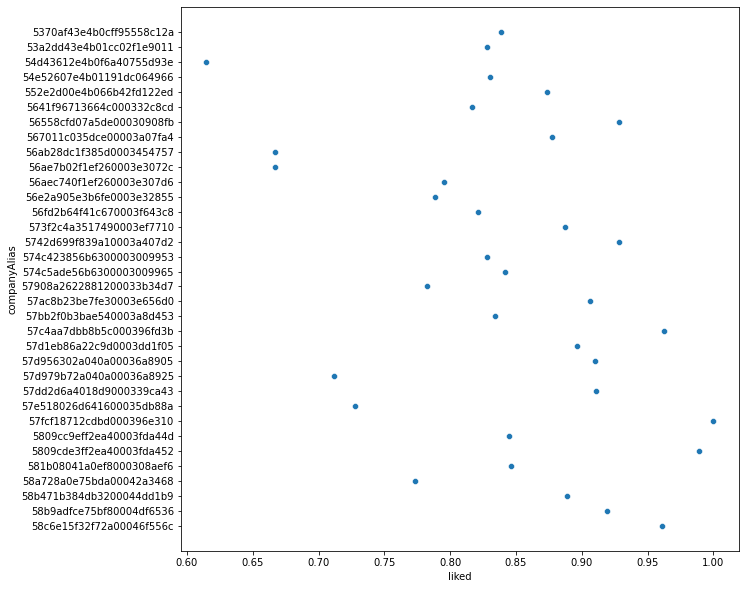

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=commentInteractions_grouped, x='liked', y='companyAlias', legend=False)

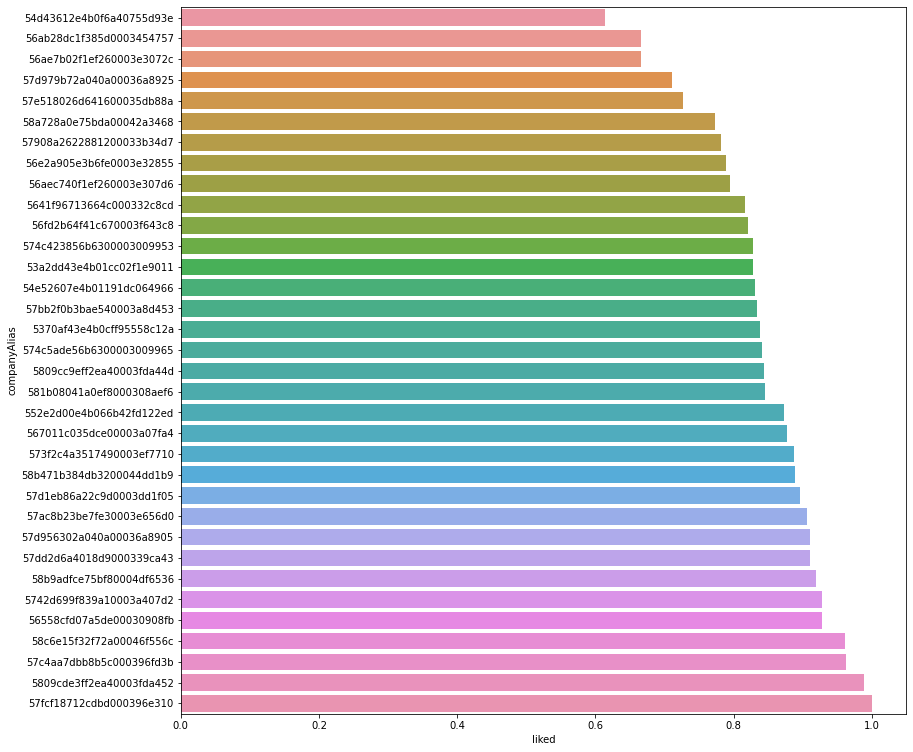

In [37]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.barplot(data=sorted_commentInteractions, x='liked', y='companyAlias')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [38]:
commentInteractions.describe()

,employee,liked,disliked
count,324471.000000,324471.000000,324471.000000
mean,172.173411,0.843696,0.156304
std,178.699301,0.363144,0.363144
min,1.000000,0.000000,0.000000
25%,45.000000,1.000000,0.000000
50%,128.000000,1.000000,0.000000
75%,214.000000,1.000000,0.000000
max,999.000000,1.000000,1.000000


In [39]:
commentInteractions.sample()

,employee,companyAlias,liked,disliked,commentId,uid
97718,561,54e52607e4b01191dc064966,1,0,582487bf936b910004b12f92,56154e52607e4b01191dc064966


# 1.3 Happyness votes data

## The data regarding the votes of the app users is stored in votes.csv. This file containg 4 different columns:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    voteDate: String representing the date a given vote was emited.
    vote: The numeric value of the vote emited ranging from 1 to 4.



In [40]:
votes

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
1,33,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
2,79,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
3,94,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,4
4,16,56aec740f1ef260003e307d6,Mon Feb 01 01:00:00 CET 2016,2
...,...,...,...,...
221227,17,573a0671b5ec330003add34a,Fri Jun 03 02:00:00 CEST 2016,3
221228,17,573a0671b5ec330003add34a,Tue Jun 07 02:00:00 CEST 2016,4
221229,17,573a0671b5ec330003add34a,Mon Jun 13 02:00:00 CEST 2016,4
221230,17,573a0671b5ec330003add34a,Tue Jun 28 02:00:00 CEST 2016,4


In [41]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221232 entries, 0 to 221231
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221232 non-null  int64 
 1   companyAlias  221232 non-null  object
 2   voteDate      221232 non-null  object
 3   vote          221232 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ MB


In [42]:
votes.voteDate = pd.to_datetime(votes.voteDate)

In [43]:
votes = votes[votes.employee > 0]
votes['uid'] = votes.employee.apply(str) + votes.companyAlias
votes = votes.drop_duplicates()

In [44]:
votes.head()

,employee,companyAlias,voteDate,vote,uid
0,31,56aec740f1ef260003e307d6,2016-02-01 01:00:00+01:00,4,3156aec740f1ef260003e307d6
1,33,56aec740f1ef260003e307d6,2016-02-01 01:00:00+01:00,4,3356aec740f1ef260003e307d6
2,79,56aec740f1ef260003e307d6,2016-02-01 01:00:00+01:00,4,7956aec740f1ef260003e307d6
3,94,56aec740f1ef260003e307d6,2016-02-01 01:00:00+01:00,4,9456aec740f1ef260003e307d6
4,16,56aec740f1ef260003e307d6,2016-02-01 01:00:00+01:00,2,1656aec740f1ef260003e307d6


In [45]:
votes.voteDate = votes.voteDate.map(dt.datetime.toordinal)

In [46]:
votes[votes.uid == '1656aec740f1ef260003e307d6'].vote.values

array([2, 3, 2, 2, 4, 3, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 2, 4, 4, 4, 2, 1, 1, 4, 1, 1, 1, 4,
       4, 1])

In [47]:
votes[votes.uid == '1656aec740f1ef260003e307d6'].voteDate.values

array([735995, 735999, 736003, 736004, 736009, 736010, 736011, 736017,
       736018, 736019, 736020, 736025, 736026, 736027, 736032, 736033,
       736038, 736039, 736040, 736041, 736044, 736053, 736054, 736055,
       736058, 736059, 736060, 736061, 736066, 736068, 736069, 736072,
       736073, 736074, 736075, 736076, 736087, 736090, 736093, 736094,
       736095, 736096, 736097, 736100, 736101, 736102, 736104, 736107,
       736109, 736111, 736114, 736116, 736117, 736118, 736123, 736128,
       736131, 736132, 736136, 736137, 736143, 736144, 736149, 736150,
       736151, 736153, 736156, 736158, 736160, 736164, 736165, 736174,
       736184, 736214, 736215, 736219, 736220, 736234, 736235, 736247,
       736254, 736264, 736271, 736284, 736289, 736291, 736300, 736305,
       736345, 736376])

In [48]:
votes.uid.unique()

array(['3156aec740f1ef260003e307d6', '3356aec740f1ef260003e307d6',
       '7956aec740f1ef260003e307d6', ..., '85958a728a0e75bda00042a3468',
       '17573a0671b5ec330003add34a', '19573a0671b5ec330003add34a'],
      dtype=object)

In [49]:
def calculate_time_between_votes(df):
    users = votes.uid.unique()
    totals = []
    for user in users:
        votes_by_id = df[df.uid == user].voteDate.values
        total = 0
        for index in range(len(votes_by_id)-1):
            total += votes_by_id[index+1]-votes_by_id[index]
        totals.append(total)
    return totals

In [50]:
activities = calculate_time_between_votes(votes)

In [51]:
len(activities)

4377

In [52]:
votes_grouped_by_user = votes.groupby('uid').mean().drop('employee', axis = 1)

In [53]:
def calculate_slopes_over_time(df):
    slopes = []
    users = df.uid.unique()
    for user in users:
        y = df[df.uid == user].vote.values
        len_y = len(y)
        x = df[df.uid == user].voteDate.values
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        slopes.append(slope)
    return slopes

slopes = calculate_slopes_over_time(votes)

/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [54]:
# we negate the slopes because the data is from the latest to the oldest
mynegslopes = [ -x for x in slopes]


In [55]:
df_happy = pd.DataFrame(list(zip(mynegslopes, votes.uid.unique())),
               columns =['Happiness', 'uid'])
df_happy = df_happy.fillna(0)

In [114]:
votes_grouped_by_user

,voteDate,vote
uid,,
10053a2dd43e4b01cc02f1e9011,736170.821862,1.004049
10054e52607e4b01191dc064966,735980.514793,2.213018
1005641f96713664c000332c8cd,736187.617647,2.137255
10056aec740f1ef260003e307d6,736292.310160,4.000000
10056e2a905e3b6fe0003e32855,736236.000000,3.750000
...,...,...
995809cc9eff2ea40003fda44d,736383.000000,3.000000
99581b08041a0ef8000308aef6,736338.363636,3.854545
99654e52607e4b01191dc064966,736289.500000,2.450000


In [174]:
df_activity = pd.DataFrame(list(zip(activities, votes.uid.unique())),
               columns =['Activity', 'uid'])
df_activity = df_activity.fillna(0)

In [175]:
votes_grouped_by_user_with_happy = votes_grouped_by_user.merge(df_happy, left_on='uid', right_on='uid')

In [176]:
votes_grouped_by_user_with_happy = votes_grouped_by_user_with_happy.merge(df_activity, left_on='uid', right_on='uid')

In [177]:
votes_grouped_by_user_with_happy

,uid,voteDate,vote,Happiness,Activity
0,10053a2dd43e4b01cc02f1e9011,736170.821862,1.004049,0.000099,254
1,10054e52607e4b01191dc064966,735980.514793,2.213018,0.000101,746
2,1005641f96713664c000332c8cd,736187.617647,2.137255,0.018121,140
3,10056aec740f1ef260003e307d6,736292.310160,4.000000,-0.000000,276
4,10056e2a905e3b6fe0003e32855,736236.000000,3.750000,-0.142857,5
...,...,...,...,...,...
4372,995809cc9eff2ea40003fda44d,736383.000000,3.000000,0.000000,0
4373,99581b08041a0ef8000308aef6,736338.363636,3.854545,-0.005784,92
4374,99654e52607e4b01191dc064966,736289.500000,2.450000,-0.008205,191
4375,99754e52607e4b01191dc064966,736282.000000,3.000000,0.000000,0


In [178]:
votes_grouped_by_user_with_happy.isna().sum()

uid          0
voteDate     0
vote         0
Happiness    0
Activity     0
dtype: int64

In [179]:
# group to analyze date with unique employees and not duplicates
votes_grouped = votes.groupby(['employee','companyAlias']).mean()

In [180]:
votes_grouped

voteDate      vote
employee companyAlias                                     
1        5474b9cde4b0bf7614b2c66f  735562.500000  4.000000
         54d43612e4b0f6a40755d93e  735955.562500  3.125000
         54e52607e4b01191dc064966  736009.029851  2.985075
         5641f96713664c000332c8cd  736252.821012  3.171206
         56558cfd07a5de00030908fb  735929.000000  3.500000
...                                          ...       ...
991      54e52607e4b01191dc064966  736228.000000  3.000000
995      54e52607e4b01191dc064966  736337.666667  2.666667
996      54e52607e4b01191dc064966  736289.500000  2.450000
997      54e52607e4b01191dc064966  736282.000000  3.000000
999      54e52607e4b01191dc064966  736291.050000  2.850000

[4377 rows x 2 columns]

In [181]:
votes_by_company = votes_grouped.groupby('companyAlias').mean().reset_index().sort_values(by='vote')

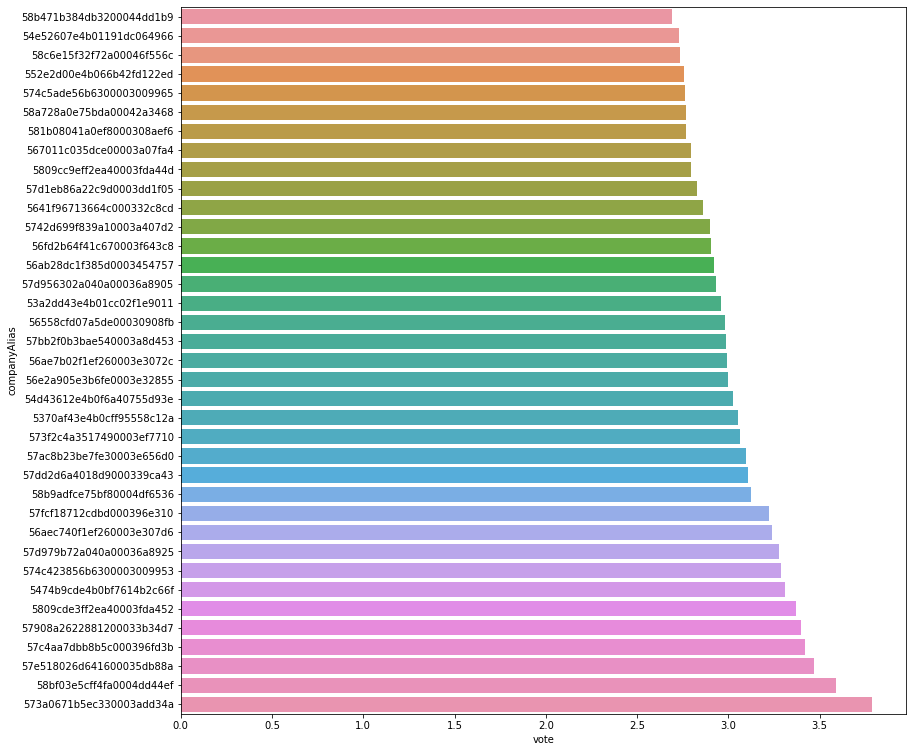

In [182]:
fig, ax = plt.subplots(figsize=(13,13))
ax = sns.barplot(data=votes_by_company, y='companyAlias', x='vote')

# 1.4 Comments data

## It is possible to find data about the comments written in the app in the anon_comments.csv file, and it has the following structure:

    employee: An integer id that identifies an amployee inside a company.
    companyAlias: A hash id for a given company that uses the app. An employee can be uniquely identified with the tuple (employee,companyAlias).
    commentDate: String representing the date a given comment was written.
    commentId: A unique id for a given comment.
    comment: Anonimized comment. It has the same length as the original comment.
    likes: Number of likes that the comment received.
    dislikes: Number of dislikes that the comment received.



In [183]:
comments_clean_anonimized

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,uid,txt_len
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,719163,30756aec740f1ef260003e307d6,62.0
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,719163,38256aec740f1ef260003e307d6,29.0
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,719163,17256aec740f1ef260003e307d6,27.0
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,719163,13556aec740f1ef260003e307d6,27.0
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,719163,22556aec740f1ef260003e307d6,33.0
...,...,...,...,...,...,...,...,...,...
81633,5,58a728a0e75bda00042a3468,58a7bafb58bf270004ed12fb,**********************************************...,0.0,0.0,719163,558a728a0e75bda00042a3468,111.0
81634,10,58a728a0e75bda00042a3468,58a73c93e75bda00042a3491,**********************************************...,4.0,0.0,719163,1058a728a0e75bda00042a3468,126.0
81635,2,58a728a0e75bda00042a3468,58a7306fe75bda00042a3474,**********************************************...,1.0,0.0,719163,258a728a0e75bda00042a3468,53.0
81636,1,58a728a0e75bda00042a3468,58a73005e75bda00042a3472,**********************************************...,12.0,0.0,719163,158a728a0e75bda00042a3468,52.0


In [184]:
comments_clean_anonimized = comments_clean_anonimized[comments_clean_anonimized.employee > 0]
comments_clean_anonimized['uid'] = comments_clean_anonimized.employee.apply(str) + comments_clean_anonimized.companyAlias
comments_clean_anonimized = comments_clean_anonimized.drop_duplicates()

In [185]:
comments_clean_anonimized['txt_len'] = comments_clean_anonimized.txt.str.len()

In [186]:
comments_clean_anonimized.commentDate = pd.to_datetime(comments_clean_anonimized.commentDate)
comments_clean_anonimized.commentDate = comments_clean_anonimized.commentDate.map(dt.datetime.toordinal)

In [187]:
comments_clean_anonimized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38994 entries, 0 to 82755
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      38994 non-null  int64  
 1   companyAlias  38994 non-null  object 
 2   commentId     38994 non-null  object 
 3   txt           38892 non-null  object 
 4   likes         38993 non-null  float64
 5   dislikes      38993 non-null  float64
 6   commentDate   38994 non-null  int64  
 7   uid           38994 non-null  object 
 8   txt_len       38892 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.0+ MB


In [188]:
def calculate_activity_over_time(df):
    slopes = []
    users = df.uid.unique()
    for user in users:
        y = df[df.uid == user].commentDate.values
        len_y = len(y)
        x = list(range(0,len_y))
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        slopes.append(slope)
    return slopes

In [189]:
activity = calculate_activity_over_time(comments_clean_anonimized)

/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/osboxes/anaconda3/lib/python3.8/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [190]:
# we negate the slopes because the data is from the latest to the oldest
mynegslopes = [ -x for x in activity]


In [191]:
df_activity = pd.DataFrame(list(zip(mynegslopes, comments_clean_anonimized.uid.unique())),
               columns =['activity', 'uid'])
#df_activity = df_activity.fillna(0)

In [192]:
df_activity.activity.isna().sum()

557

In [193]:
df_activity[df_activity.uid == '17256aec740f1ef260003e307d6']

,activity,uid
2,-0.0,17256aec740f1ef260003e307d6


In [194]:
comments_clean_anonimized[comments_clean_anonimized.uid == '36158a728a0e75bda00042a3468']

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,uid,txt_len
80571,361,58a728a0e75bda00042a3468,58cbf6321da6390004e09a0d,***************************************,18.0,9.0,719163,36158a728a0e75bda00042a3468,39.0
80573,361,58a728a0e75bda00042a3468,58cbf6321da6390004e09a0c,**********************************************...,15.0,0.0,719163,36158a728a0e75bda00042a3468,115.0
80676,361,58a728a0e75bda00042a3468,58ca4419bd760e00043f198a,**********************************************...,18.0,1.0,719163,36158a728a0e75bda00042a3468,189.0
80812,361,58a728a0e75bda00042a3468,58c69f4bdc635b0004321d93,**********************************************...,50.0,0.0,719163,36158a728a0e75bda00042a3468,329.0
80866,361,58a728a0e75bda00042a3468,58c2b19d2472460004036c7c,*******,1.0,2.0,719163,36158a728a0e75bda00042a3468,7.0
80912,361,58a728a0e75bda00042a3468,58c17a119653a3000411721f,**********************************************...,24.0,0.0,719163,36158a728a0e75bda00042a3468,138.0
81058,361,58a728a0e75bda00042a3468,58be6eb70d9dcc0004d8538d,**********************************************...,5.0,3.0,719163,36158a728a0e75bda00042a3468,90.0
81463,361,58a728a0e75bda00042a3468,58b03b20e5efa8000476762a,**********************************************...,14.0,7.0,719163,36158a728a0e75bda00042a3468,147.0
81539,361,58a728a0e75bda00042a3468,58aee1059fd38f00045eef58,**********************************************...,6.0,2.0,719163,36158a728a0e75bda00042a3468,85.0
81594,361,58a728a0e75bda00042a3468,58adb214b8242400048bf8a6,**********************************************...,10.0,0.0,719163,36158a728a0e75bda00042a3468,77.0


In [195]:
comments_clean_anonimized.isna().sum()
# txt with NaN = 0 to len.

employee          0
companyAlias      0
commentId         0
txt             102
likes             1
dislikes          1
commentDate       0
uid               0
txt_len         102
dtype: int64

In [196]:
df_activity[df_activity.activity > 30474]

,activity,uid


In [197]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   activity  2324 non-null   float64
 1   uid       2881 non-null   object 
dtypes: float64(1), object(1)
memory usage: 45.1+ KB


In [198]:
comments_clean_anonimized.describe()

,employee,likes,dislikes,commentDate,txt_len
count,38994.000000,38993.000000,38993.000000,38994.0,38892.000000
mean,150.956634,7.002488,1.297977,719163.0,102.405379
std,157.279482,7.773628,2.748012,0.0,202.858059
min,1.000000,0.000000,0.000000,719163.0,1.000000
25%,38.000000,2.000000,0.000000,719163.0,28.000000
50%,112.000000,4.000000,0.000000,719163.0,57.000000
75%,207.000000,10.000000,1.000000,719163.0,119.000000
max,999.000000,86.000000,53.000000,719163.0,29057.000000


In [199]:
comments_clean_anonimized[['commentId','uid']]

,commentId,uid
0,58d018d7e010990004e38070,30756aec740f1ef260003e307d6
1,58d0179ae010990004e3806d,38256aec740f1ef260003e307d6
2,58cff8cde010990004e37f6a,17256aec740f1ef260003e307d6
3,58cfefeee010990004e37f60,13556aec740f1ef260003e307d6
4,58cfd9b4e010990004e37f52,22556aec740f1ef260003e307d6
...,...,...
81633,58a7bafb58bf270004ed12fb,558a728a0e75bda00042a3468
81634,58a73c93e75bda00042a3491,1058a728a0e75bda00042a3468
81635,58a7306fe75bda00042a3474,258a728a0e75bda00042a3468
81636,58a73005e75bda00042a3472,158a728a0e75bda00042a3468


In [200]:
comments_of_churned_people = comments_clean_anonimized[['commentId','uid']][comments_clean_anonimized['uid'].isin(personnes_absentes)]
comments_of_churned_people

,commentId,uid
936,5873418574f9080004b44f2a,23256aec740f1ef260003e307d6
1160,585a4026da8c4a000470c4f4,23256aec740f1ef260003e307d6
1176,5858f02ef830b00004e7a03e,23256aec740f1ef260003e307d6
1370,5847ec0ff77d9e00047003b0,15556aec740f1ef260003e307d6
1371,5847eb09f77d9e00047003af,23256aec740f1ef260003e307d6
...,...,...
75797,577e204470596c0003e535f3,1615742d699f839a10003a407d2
75819,577cd18d5235410003d2ea41,1615742d699f839a10003a407d2
75884,577a10112736100003a49d6a,1615742d699f839a10003a407d2
75888,5778fa9003dac900038c8c6c,1615742d699f839a10003a407d2


In [201]:
commentInteractions[commentInteractions.commentId.isin(comments_of_churned_people)]

,employee,companyAlias,liked,disliked,commentId,uid,liked_churned_people


In [202]:
people_which_liked_churned_people = commentInteractions[(commentInteractions.commentId.isin(comments_of_churned_people.commentId)) & (commentInteractions.liked == 1)]
people_which_liked_churned_people

,employee,companyAlias,liked,disliked,commentId,uid,liked_churned_people
9084,24,56aec740f1ef260003e307d6,1,0,5873418574f9080004b44f2a,2456aec740f1ef260003e307d6,1
9085,491,56aec740f1ef260003e307d6,1,0,5873418574f9080004b44f2a,49156aec740f1ef260003e307d6,1
10591,139,56aec740f1ef260003e307d6,1,0,5858f02ef830b00004e7a03e,13956aec740f1ef260003e307d6,1
10592,136,56aec740f1ef260003e307d6,1,0,5858f02ef830b00004e7a03e,13656aec740f1ef260003e307d6,1
10593,108,56aec740f1ef260003e307d6,1,0,5858f02ef830b00004e7a03e,10856aec740f1ef260003e307d6,1
...,...,...,...,...,...,...,...
304260,6,5742d699f839a10003a407d2,1,0,576ba6ef60bb1c0003016fbc,65742d699f839a10003a407d2,1
308061,68,5742d699f839a10003a407d2,1,0,5742f6d3f839a10003a40815,685742d699f839a10003a407d2,1
308062,11,5742d699f839a10003a407d2,1,0,5742f6d3f839a10003a40815,115742d699f839a10003a407d2,1
308063,33,5742d699f839a10003a407d2,1,0,5742f6d3f839a10003a40815,335742d699f839a10003a407d2,1


In [203]:
commentInteractions['liked_churned_people'] = np.where(commentInteractions.uid.isin(people_which_liked_churned_people.uid), 1, 0)

In [204]:
commentInteractions

,employee,companyAlias,liked,disliked,commentId,uid,liked_churned_people
0,307,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,30756aec740f1ef260003e307d6,0
1,36,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,3656aec740f1ef260003e307d6,1
2,276,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,27656aec740f1ef260003e307d6,0
3,24,56aec740f1ef260003e307d6,1,0,58d018d7e010990004e38070,2456aec740f1ef260003e307d6,1
4,382,56aec740f1ef260003e307d6,1,0,58d0179ae010990004e3806d,38256aec740f1ef260003e307d6,1
...,...,...,...,...,...,...,...
336952,146,58a728a0e75bda00042a3468,1,0,58ad8adeb8242400048bf834,14658a728a0e75bda00042a3468,0
336953,449,58a728a0e75bda00042a3468,1,0,58ad8adeb8242400048bf834,44958a728a0e75bda00042a3468,0
336954,26,58a728a0e75bda00042a3468,1,0,58ad8adeb8242400048bf834,2658a728a0e75bda00042a3468,0
336956,232,58a728a0e75bda00042a3468,1,0,58ad8adeb8242400048bf834,23258a728a0e75bda00042a3468,0


In [205]:
commentInteractions[commentInteractions.uid == '1005641f96713664c000332c8cd']

,employee,companyAlias,liked,disliked,commentId,uid,liked_churned_people
186908,100,5641f96713664c000332c8cd,1,0,57f6c357e308980003c285c0,1005641f96713664c000332c8cd,1
186919,100,5641f96713664c000332c8cd,1,0,57f6be1044892f00033aa1ad,1005641f96713664c000332c8cd,1
186991,100,5641f96713664c000332c8cd,1,0,57f673cd44892f00033aa176,1005641f96713664c000332c8cd,1
187011,100,5641f96713664c000332c8cd,0,1,57f6669944892f00033aa16d,1005641f96713664c000332c8cd,1
187030,100,5641f96713664c000332c8cd,1,0,57f61ac944892f00033aa12e,1005641f96713664c000332c8cd,1
...,...,...,...,...,...,...,...
204742,100,5641f96713664c000332c8cd,1,0,57541d0b01dbb2000395d2d8,1005641f96713664c000332c8cd,1
204793,100,5641f96713664c000332c8cd,0,1,5753fade01dbb2000395d2d1,1005641f96713664c000332c8cd,1
204869,100,5641f96713664c000332c8cd,1,0,5752da225cdb520003700bd4,1005641f96713664c000332c8cd,1
206315,100,5641f96713664c000332c8cd,1,0,573f6e723517490003ef772d,1005641f96713664c000332c8cd,1


In [206]:
total_interaction_by_user = commentInteractions.groupby('uid').sum().drop('employee', axis = 1)
total_interaction_by_user.liked_churned_people = np.where(total_interaction_by_user.liked_churned_people == 0, 0, 1)
total_interaction_by_user

,liked,disliked,liked_churned_people
uid,,,
10053a2dd43e4b01cc02f1e9011,60,55,0
1005641f96713664c000332c8cd,191,90,1
10056aec740f1ef260003e307d6,288,2,1
10056e2a905e3b6fe0003e32855,11,0,0
10056fd2b64f41c670003f643c8,5,0,1
...,...,...,...
9957bb2f0b3bae540003a8d453,33,20,0
9957dd2d6a4018d9000339ca43,1,0,0
99581b08041a0ef8000308aef6,31,33,0


<AxesSubplot:>

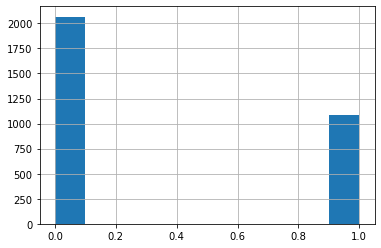

In [207]:
total_interaction_by_user.liked_churned_people.hist()

In [208]:
comments_clean_anonimized.likes.sum()

273048.0

In [209]:
comments_clean_anonimized.dislikes.sum()

50612.0

In [210]:
comments_grouped = comments_clean_anonimized.groupby('companyAlias').mean().drop('employee', axis = 1).sort_values(by=['likes'], ascending = False)
comments_grouped.head()

,likes,dislikes,commentDate,txt_len
companyAlias,,,,
5742d699f839a10003a407d2,14.238628,1.112975,719163.0,198.979065
5641f96713664c000332c8cd,12.640990,2.844197,719163.0,140.652933
574c5ade56b6300003009965,10.133936,1.902629,719163.0,126.624486
58a728a0e75bda00042a3468,10.071766,2.841360,719163.0,98.922568
57d956302a040a00036a8905,9.160800,0.902400,719163.0,105.902400


<AxesSubplot:xlabel='txt_len', ylabel='likes'>

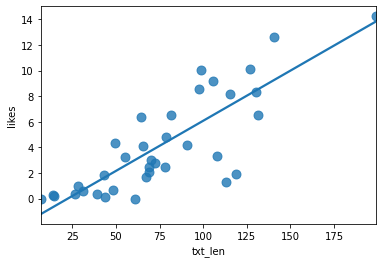

In [211]:
sns.regplot(data=comments_grouped, x="txt_len", y="likes",  scatter_kws={"s": 80}, ci=None, robust=True)

<AxesSubplot:xlabel='txt_len', ylabel='dislikes'>

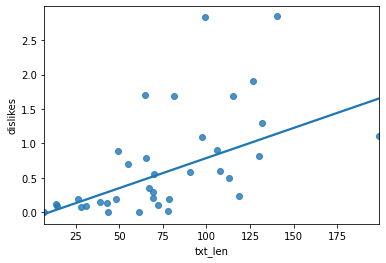

In [212]:
sns.regplot(data=comments_grouped, x="txt_len", y="dislikes", robust= True, ci=None)

#  Datasets merger

In [213]:
churn.sample(2) 
# numVotes is not up to date !!!

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,uid
4726,555,58a728a0e75bda00042a3468,6,2017-03-10 01:00:00+01:00,True,55558a728a0e75bda00042a3468
630,166,5370af43e4b0cff95558c12a,2,2016-10-18 02:00:00+02:00,False,1665370af43e4b0cff95558c12a


In [214]:
churn.numVotes.sum()

222460

In [215]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4846
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype                    
---  ------                 --------------  -----                    
 0   employee               4418 non-null   int64                    
 1   companyAlias           4418 non-null   object                   
 2   numVotes               4418 non-null   int64                    
 3   lastParticipationDate  4418 non-null   datetime64[ns, tzlocal()]
 4   stillExists            4418 non-null   bool                     
 5   uid                    4418 non-null   object                   
dtypes: bool(1), datetime64[ns, tzlocal()](1), int64(2), object(2)
memory usage: 371.4+ KB


In [216]:
total_interaction_by_user.sample(2)

,liked,disliked,liked_churned_people
uid,,,
13654e52607e4b01191dc064966,7,1,1
115641f96713664c000332c8cd,976,202,1


In [217]:
total_interaction_by_user.head()

,liked,disliked,liked_churned_people
uid,,,
10053a2dd43e4b01cc02f1e9011,60,55,0
1005641f96713664c000332c8cd,191,90,1
10056aec740f1ef260003e307d6,288,2,1
10056e2a905e3b6fe0003e32855,11,0,0
10056fd2b64f41c670003f643c8,5,0,1


In [218]:
total_interaction_by_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3147 entries, 10053a2dd43e4b01cc02f1e9011 to 99954e52607e4b01191dc064966
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   liked                 3147 non-null   int64
 1   disliked              3147 non-null   int64
 2   liked_churned_people  3147 non-null   int64
dtypes: int64(3)
memory usage: 98.3+ KB


In [219]:
votes.sample(2)

,employee,companyAlias,voteDate,vote,uid
159431,52,574c5ade56b6300003009965,736151,3,52574c5ade56b6300003009965
212399,169,57d956302a040a00036a8905,736270,4,16957d956302a040a00036a8905


In [220]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221145 entries, 0 to 221231
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   employee      221145 non-null  int64 
 1   companyAlias  221145 non-null  object
 2   voteDate      221145 non-null  int64 
 3   vote          221145 non-null  int64 
 4   uid           221145 non-null  object
dtypes: int64(3), object(2)
memory usage: 10.1+ MB


In [221]:
comments_clean_anonimized.sample(2)

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,uid,txt_len
71488,188,5742d699f839a10003a407d2,5880e7210e677f0004390afb,**********************************************...,17.0,0.0,719163,1885742d699f839a10003a407d2,59.0
14900,111,57bb2f0b3bae540003a8d453,57fcf9f312cdbd000396e31b,**********************************************...,10.0,0.0,719163,11157bb2f0b3bae540003a8d453,58.0


In [222]:
comments_clean_anonimized[comments_clean_anonimized.uid == '10053a2dd43e4b01cc02f1e9011']

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,uid,txt_len
63457,100,53a2dd43e4b01cc02f1e9011,57e97335bad95d00030858c3,**********************************************...,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,522.0
63527,100,53a2dd43e4b01cc02f1e9011,57c97219a550ce0003eb5e89,**********************************************...,2.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,81.0
63803,100,53a2dd43e4b01cc02f1e9011,57759786f907d700031600c3,**********************************************...,2.0,4.0,719163,10053a2dd43e4b01cc02f1e9011,201.0
63848,100,53a2dd43e4b01cc02f1e9011,576c27f6c7cda30003363ce5,**********************************,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,34.0
63884,100,53a2dd43e4b01cc02f1e9011,5765783a44bef90003294c13,**********************************************...,1.0,3.0,719163,10053a2dd43e4b01cc02f1e9011,252.0
63924,100,53a2dd43e4b01cc02f1e9011,57603c51fdfb340003a74c4b,**********************************************...,1.0,1.0,719163,10053a2dd43e4b01cc02f1e9011,239.0
64059,100,53a2dd43e4b01cc02f1e9011,574b5a16b62d4600039c9148,**********************************************...,1.0,3.0,719163,10053a2dd43e4b01cc02f1e9011,157.0
64087,100,53a2dd43e4b01cc02f1e9011,5746e87755015a00032e11fa,**********************************************...,3.0,5.0,719163,10053a2dd43e4b01cc02f1e9011,217.0
64162,100,53a2dd43e4b01cc02f1e9011,573ce28a44d85900031c3b7d,**********************************************...,2.0,5.0,719163,10053a2dd43e4b01cc02f1e9011,142.0
64175,100,53a2dd43e4b01cc02f1e9011,573b8b0a8a14ae0003ac74c0,********************************************,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,44.0


In [223]:
comments_clean_anonimized[comments_clean_anonimized.uid == '10053a2dd43e4b01cc02f1e9011']

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate,uid,txt_len
63457,100,53a2dd43e4b01cc02f1e9011,57e97335bad95d00030858c3,**********************************************...,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,522.0
63527,100,53a2dd43e4b01cc02f1e9011,57c97219a550ce0003eb5e89,**********************************************...,2.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,81.0
63803,100,53a2dd43e4b01cc02f1e9011,57759786f907d700031600c3,**********************************************...,2.0,4.0,719163,10053a2dd43e4b01cc02f1e9011,201.0
63848,100,53a2dd43e4b01cc02f1e9011,576c27f6c7cda30003363ce5,**********************************,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,34.0
63884,100,53a2dd43e4b01cc02f1e9011,5765783a44bef90003294c13,**********************************************...,1.0,3.0,719163,10053a2dd43e4b01cc02f1e9011,252.0
63924,100,53a2dd43e4b01cc02f1e9011,57603c51fdfb340003a74c4b,**********************************************...,1.0,1.0,719163,10053a2dd43e4b01cc02f1e9011,239.0
64059,100,53a2dd43e4b01cc02f1e9011,574b5a16b62d4600039c9148,**********************************************...,1.0,3.0,719163,10053a2dd43e4b01cc02f1e9011,157.0
64087,100,53a2dd43e4b01cc02f1e9011,5746e87755015a00032e11fa,**********************************************...,3.0,5.0,719163,10053a2dd43e4b01cc02f1e9011,217.0
64162,100,53a2dd43e4b01cc02f1e9011,573ce28a44d85900031c3b7d,**********************************************...,2.0,5.0,719163,10053a2dd43e4b01cc02f1e9011,142.0
64175,100,53a2dd43e4b01cc02f1e9011,573b8b0a8a14ae0003ac74c0,********************************************,1.0,2.0,719163,10053a2dd43e4b01cc02f1e9011,44.0


In [224]:
comments_clean_anonimized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38994 entries, 0 to 82755
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   employee      38994 non-null  int64  
 1   companyAlias  38994 non-null  object 
 2   commentId     38994 non-null  object 
 3   txt           38892 non-null  object 
 4   likes         38993 non-null  float64
 5   dislikes      38993 non-null  float64
 6   commentDate   38994 non-null  int64  
 7   uid           38994 non-null  object 
 8   txt_len       38892 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.0+ MB


In [225]:
comments_light = comments_clean_anonimized.drop(['employee','companyAlias','txt', 'commentDate'], axis=1).dropna()
comments_light

,commentId,likes,dislikes,uid,txt_len
0,58d018d7e010990004e38070,4.0,0.0,30756aec740f1ef260003e307d6,62.0
1,58d0179ae010990004e3806d,1.0,2.0,38256aec740f1ef260003e307d6,29.0
2,58cff8cde010990004e37f6a,3.0,0.0,17256aec740f1ef260003e307d6,27.0
3,58cfefeee010990004e37f60,1.0,1.0,13556aec740f1ef260003e307d6,27.0
4,58cfd9b4e010990004e37f52,3.0,2.0,22556aec740f1ef260003e307d6,33.0
...,...,...,...,...,...
81632,58a8a81158bf270004ed1326,7.0,5.0,658a728a0e75bda00042a3468,81.0
81633,58a7bafb58bf270004ed12fb,0.0,0.0,558a728a0e75bda00042a3468,111.0
81634,58a73c93e75bda00042a3491,4.0,0.0,1058a728a0e75bda00042a3468,126.0
81635,58a7306fe75bda00042a3474,1.0,0.0,258a728a0e75bda00042a3468,53.0


In [226]:
comments_light[comments_light.uid == '158a728a0e75bda00042a3468']

,commentId,likes,dislikes,uid,txt_len
80488,58cff0c9e010990004e37f62,5.0,0.0,158a728a0e75bda00042a3468,173.0
80588,58cbe1851da6390004e099c6,2.0,1.0,158a728a0e75bda00042a3468,47.0
80593,58cbe1851da6390004e099c5,1.0,0.0,158a728a0e75bda00042a3468,82.0
80659,58ca639c92db640004f9548a,3.0,1.0,158a728a0e75bda00042a3468,59.0
80820,58c68714dc635b0004321c7d,2.0,0.0,158a728a0e75bda00042a3468,21.0
81095,58bd66cb31608400049b312f,3.0,0.0,158a728a0e75bda00042a3468,78.0
81142,58b97c63e75bf80004df634c,12.0,1.0,158a728a0e75bda00042a3468,173.0
81260,58b70c61917c350004dc0ba7,12.0,0.0,158a728a0e75bda00042a3468,76.0
81480,58b01027e5efa800047675fa,1.0,2.0,158a728a0e75bda00042a3468,109.0
81549,58aec97f9fd38f00045eef47,6.0,1.0,158a728a0e75bda00042a3468,45.0


In [227]:
df = (churn.drop(['employee','companyAlias','lastParticipationDate'], axis=1).merge(total_interaction_by_user, left_on='uid', right_on='uid').
        merge(votes_grouped_by_user_with_happy, left_on='uid', right_on='uid').merge(comments_light.groupby('uid').mean(), left_on='uid', right_on='uid'))

In [228]:
df

,numVotes,stillExists,uid,liked,disliked,liked_churned_people,voteDate,vote,Happiness,Activity,likes,dislikes,txt_len
0,4,True,51256aec740f1ef260003e307d6,6,0,0,736365.500000,2.500000,-0.000000,37,7.500000,1.000000,114.500000
1,72,True,256aec740f1ef260003e307d6,60,12,1,736168.361111,2.250000,-0.000805,406,5.428571,4.785714,59.571429
2,14,False,48756aec740f1ef260003e307d6,1,0,0,736276.785714,3.142857,0.006202,66,6.000000,0.000000,92.000000
3,14,False,48756aec740f1ef260003e307d6,1,0,0,736276.785714,3.142857,0.006202,66,6.000000,0.000000,92.000000
4,22,True,356aec740f1ef260003e307d6,6,5,0,736120.318182,3.454545,-0.001876,378,3.333333,0.888889,85.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2585,4,True,84958a728a0e75bda00042a3468,11,0,0,736403.250000,2.750000,-0.257143,4,1.000000,0.500000,56.500000
2586,3,True,85058a728a0e75bda00042a3468,8,4,0,736403.666667,3.666667,0.285714,3,10.333333,0.000000,115.333333
2587,5,True,85258a728a0e75bda00042a3468,28,8,0,736405.000000,2.600000,-0.600000,4,10.666667,5.666667,87.000000
2588,1,True,85658a728a0e75bda00042a3468,1,0,0,736405.000000,4.000000,0.000000,0,15.000000,0.000000,386.000000


In [229]:
df.describe()

,numVotes,liked,disliked,liked_churned_people,voteDate,vote,Happiness,Activity,likes,dislikes,txt_len
count,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000
mean,70.173359,101.979537,18.910425,0.376448,736246.305450,2.915337,0.002937,183.113514,6.999742,1.238468,93.809001
std,82.805307,203.032179,53.067661,0.484588,123.706463,0.659218,0.075142,155.335884,5.727691,1.944806,80.578603
min,0.000000,0.000000,0.000000,0.000000,735656.111111,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
25%,14.000000,8.000000,1.000000,0.000000,736191.721069,2.555556,-0.001595,63.000000,2.703203,0.111111,43.000000
50%,40.000000,33.000000,4.000000,0.000000,736271.570598,3.000000,0.000243,164.500000,5.430195,0.666667,71.518116
75%,95.000000,103.750000,16.000000,1.000000,736326.163889,3.333333,0.003493,265.000000,9.990000,1.624344,117.333333
max,740.000000,3151.000000,891.000000,1.000000,736405.000000,4.000000,2.000000,770.000000,46.000000,33.000000,880.500000


# Saving cleaned dataset

In [230]:
df.to_csv('df_to_machine_learning.csv', index=False)